In [4]:
# 데이터 불러오기

fileName = "copier_maintenance.txt"

import pandas as pd

file = pd.read_csv(fileName, sep = '\t')


file.head()

,minutes,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


In [5]:
# anova table

import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('copiers ~ minutes', data=file).fit()

table = sm.stats.anova_lm(lm, typ=2)

print(table)

              sum_sq    df           F        PR(>F)
minutes   325.974018   1.0  968.657196  4.009032e-31
Residual   14.470427  43.0         NaN           NaN


In [7]:
# f-test

from scipy.stats import f_oneway

data1 = file["copiers"]
data2 = file["minutes"]

f_stat_value, p_value = f_oneway(data1, data2)

print(f_stat_value) # 크다는 것은 여러 집단 간 차이가 크다는 것
print(p_value) # 

124.1985399787902
1.6672258082258749e-18


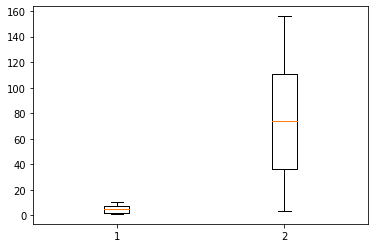

In [14]:
# f-test

import matplotlib.pyplot as plt

# alpha = 0.05 #Or whatever you want your alpha to be.
# p_value = f_oneway.cdf(f_stat_value, data1, data2)
# if p_value > alpha:
#     print("asdasd")
# else:
#     print("a;;;;;")
plt.boxplot([data1, data2])
plt.show()